In [2]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
import sys #sys needed only for python version
#import gaussian naive bayes from scikit-learn
import sklearn as sk
#seaborn for pretty plots
import seaborn as sns

#display versions of python and packages
print('\npython version ' + sys.version)
print('pandas version ' + pd.__version__)
print('numpy version ' + np.__version__)
print('sk-learn version ' + sk.__version__)
print('seaborn version ' + sns.__version__)


python version 2.7.13 (default, Dec 18 2016, 07:03:39) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
pandas version 0.19.2
numpy version 1.12.0
sk-learn version 0.18.1
seaborn version 0.7.1


In [4]:
#read in data. it's comma-separated with no column names.
df = pd.read_csv('agaricus-lepiota.data', sep=',', header=None,
                 error_bad_lines=False, warn_bad_lines=True, low_memory=False)
# set pandas to output all of the columns in output
pd.options.display.max_columns = 25
#show the first 5 rows
print(df.sample(n=5))

     0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22
134   e  f  s  w  t  a  f  w  n  p  t  b  s  s  w  w  p  w  o  p  n  v  d
2665  e  x  y  g  t  n  f  c  b  u  t  b  s  s  p  g  p  w  o  p  k  y  d
1720  e  f  s  n  f  n  f  w  b  n  t  e  f  f  w  w  p  w  o  e  k  s  g
1933  e  f  f  g  f  n  f  w  b  k  t  e  f  f  w  w  p  w  o  e  k  a  g
909   p  x  s  n  t  p  f  c  n  w  e  e  s  s  w  w  p  w  o  p  n  v  g


In [5]:
#add column names from documentation (1st col is class: e=edible,p=poisonous; rest are attributes)
df.columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
             'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
             'stalk-surf-above-ring','stalk-surf-below-ring','stalk-color-above-ring','stalk-color-below-ring',
             'veil-type','veil-color','ring-number','ring-type','spore-color','population','habitat']

print("Example values:\n")
print(df.iloc[3984])

Example values:

class                     e
cap-shape                 x
cap-surface               y
cap-color                 b
bruises                   t
odor                      n
gill-attachment           f
gill-spacing              c
gill-size                 b
gill-color                e
stalk-shape               e
stalk-root                ?
stalk-surf-above-ring     s
stalk-surf-below-ring     s
stalk-color-above-ring    e
stalk-color-below-ring    w
veil-type                 p
veil-color                w
ring-number               t
ring-type                 e
spore-color               w
population                c
habitat                   w
Name: 3984, dtype: object


e    4208
p    3916
Name: class, dtype: int64


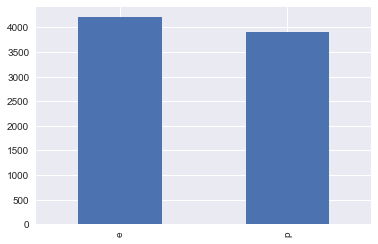

In [6]:
#show plots in notebook
%matplotlib inline

#bar chart of classes using pandas plotting
print(df['class'].value_counts())
df['class'].value_counts().plot(kind='bar')

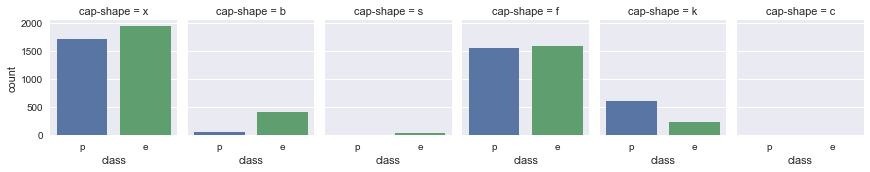

In [7]:
#seaborn factorplot to show edible/poisonous breakdown by different factors
df_forplot = df.loc[:,('class','cap-shape','gill-color')]
g = sns.factorplot("class", col="cap-shape", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

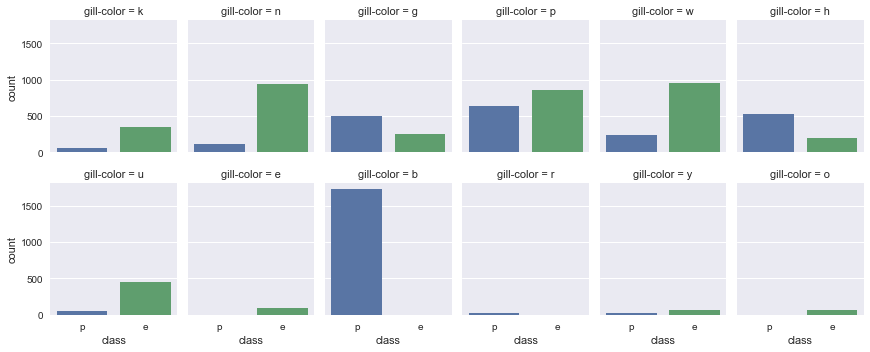

In [8]:
g = sns.factorplot("class", col="gill-color", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

In [9]:
#put the features into X (everything except the 0th column)
X = pd.DataFrame(df, columns=df.columns[1:len(df.columns)], index=df.index)
#put the class values (0th column) into Y 
Y = df['class']

#encode the text category labels as numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
#print(le.classes_)
#print(np.array(Y))
#Y values now boolean values; poison = 1
y = le.transform(Y)
#print(y_train)

#have to initialize or get error below
x = pd.DataFrame(X,columns=[X.columns[0]])
#encode each feature column and add it to x_train
for colname in X.columns:
    le.fit(X[colname])
    print(colname, le.classes_)
    x[colname] = le.transform(X[colname])

print('\nExample Feature Values - row 1 in X:')
print(X.iloc[1])
print('\nExample Encoded Feature Values - row 1 in x:')
print(x.iloc[1])
print('\nClass Values (Y):')
print(np.array(Y))
print('\nEncoded Class Values (y):')
print(y)

('cap-shape', array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object))
('cap-surface', array(['f', 'g', 's', 'y'], dtype=object))
('cap-color', array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object))
('bruises', array(['f', 't'], dtype=object))
('odor', array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object))
('gill-attachment', array(['a', 'f'], dtype=object))
('gill-spacing', array(['c', 'w'], dtype=object))
('gill-size', array(['b', 'n'], dtype=object))
('gill-color', array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'], dtype=object))
('stalk-shape', array(['e', 't'], dtype=object))
('stalk-root', array(['?', 'b', 'c', 'e', 'r'], dtype=object))
('stalk-surf-above-ring', array(['f', 'k', 's', 'y'], dtype=object))
('stalk-surf-below-ring', array(['f', 'k', 's', 'y'], dtype=object))
('stalk-color-above-ring', array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object))
('stalk-color-below-ring', array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w'

In [13]:
# actually doing the damn machine learning
#split the dataset into training and test sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

#initialize and fit the naive bayes classifier
from sklearn.naive_bayes import GaussianNB
skgnb = GaussianNB()
skgnb.fit(x_train,y_train)
train_predict = skgnb.predict(x_train)
#print(train_predict)

#see how accurate the training data was fit
from sklearn import metrics
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))

#use the trained model to predict the test values
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))

('Training accuracy:', 0.92265294874150283)
('Testing accuracy:', 0.93062290190227526)


In [14]:
print("\nClassification Report:")
print(metrics.classification_report(y_test, test_predict, target_names=['edible','poisonous']))
print("\nConfusion Matrix:")
skcm = metrics.confusion_matrix(y_test,test_predict)
#putting it into a dataframe so it prints the labels
skcm = pd.DataFrame(skcm, columns=['predicted-edible','predicted-poisonous'])
skcm['actual'] = ['edible','poisonous']
skcm = skcm.set_index('actual')


print(skcm)

print("\nScore (same thing as test accuracy?): ", skgnb.score(x_test,y_test))


Classification Report:
             precision    recall  f1-score   support

     edible       0.93      0.94      0.93      1382
  poisonous       0.93      0.92      0.93      1299

avg / total       0.93      0.93      0.93      2681


Confusion Matrix:
           predicted-edible  predicted-poisonous
actual                                          
edible                 1294                   88
poisonous                98                 1201
('\nScore (same thing as test accuracy?): ', 0.93062290190227526)
